In [1]:
import ElectionLib, tf
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
en_stops = set(stopwords.words('english'))

def Common_key(a,b):
	dic={}
	count=0
	for i in a.keys():
		for j in b.keys(): 
			if i==j:
				dic[i]=[a[i],b[j]]
				count+=1
			if count == 10:
				return dic
	return dic

def wordCount(data):
	wordcount={}
	ps = PorterStemmer()
	lemmatizer = WordNetLemmatizer()
	for line in data:
		words=line.split()
		for word in words:
			#preproccess 
			if len(word)<=1:
				continue

			word=re.sub(r'\W+', '',word) #Only Alphanumeric
			word=word.lower()
			word=lemmatizer.lemmatize(word)
			#word=ps.stem(word)
			if word in en_stops:
				continue
			else:
				wordcount[word]=wordcount.get(word,0)+1
	return wordcount

'''def list2text(data):
	text=''
	for line in data:
		text=text+line+' '
	return text
'''

def showBarGraph(data,col,party,media,xlabel,ylabel,title):
	x=[]
	y=[]
	k = Counter(data)
	high = k.most_common(10)
	for val in high:
		x.append(val[0])
		y.append(val[1])

	plt.bar(x,y, color=col)
	plt.title(title+' for '+party+' on '+media, fontsize=14)
	plt.xlabel(xlabel, fontsize=12)
	plt.ylabel(ylabel, fontsize=12)
	plt.show()


def eventDictScore(test,sentences):
	events={}
	analyzer = SentimentIntensityAnalyzer()

	for word in test[:10]:
		#print(word[1])
		events[word[1]]=0
	#print(events)

	#events=['indian'] 
	# This is to analyse the sentiment of text
	for event in events.keys():
		#print(event)
		for sentence in sentences:
			num=0
			if re.search(event,sentence):
				num+=1
				#print(event,sentence) 
				sentiment_dict = analyzer.polarity_scores(sentence)
				events[event]+=sentiment_dict['compound']
			#print("\nTranslated Sentence=",translated_text, "\nDictionary=",sentiment_dict)
				'''print("\nSentence=",sentence, "\nDictionary=",sentiment_dict)
				if sentiment_dict['compound'] >= 0.05 :
						print("It is a Positive Sentence")
				elif sentiment_dict['compound'] <= - 0.05 :
					print("It is a Negative Sentence")
				else :   
					print("It is a Neutral Sentence")'''
		try:
			events[event]/=num
		except:
			pass
			
	return events

In [3]:
twi_bjp_data=ElectionLib.exportDataTwitter("en","b")
red_bjp_data=ElectionLib.exportDataReddit("b")

twi_bjp_count=wordCount(twi_bjp_data)
red_bjp_count=wordCount(red_bjp_data)
bjp_data_count=wordCount(twi_bjp_data+red_bjp_data)

tf_bjp_twi=tf.computeTF(twi_bjp_count,twi_bjp_data)
tf_bjp_red=tf.computeTF(red_bjp_count,red_bjp_data)

idfs_bjp = tf.computeIDF(len(twi_bjp_data)+len(red_bjp_data),bjp_data_count)

tfidf_bjp_twi=tf.computeTFIDF(tf_bjp_twi,idfs_bjp)
tfidf_bjp_red=tf.computeTFIDF(tf_bjp_red,idfs_bjp)


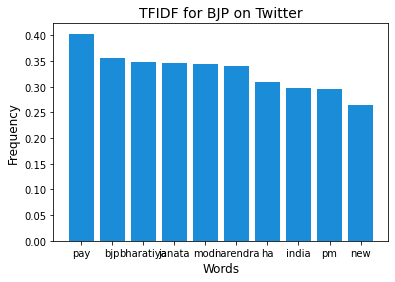

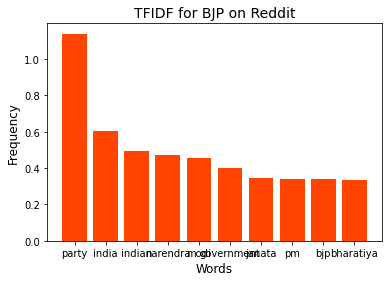

In [4]:
showBarGraph(tfidf_bjp_twi,'#1a8cd8','BJP','Twitter','Words','Frequency','TFIDF')
showBarGraph(tfidf_bjp_red,'#ff4500','BJP','Reddit','Words','Frequency','TFIDF')

In [5]:
twi_bjp_tfidf=sorted(((value,key) for (key,value) in tfidf_bjp_twi.items()), reverse=True)
#print(eventDictScore(twi_bjp_tfidf,twi_bjp_data))

red_bjp_tfidf=sorted(((value,key) for (key,value) in tfidf_bjp_red.items()), reverse=True)
#print(eventDictScore(red_bjp_tfidf,red_bjp_data))

In [6]:
twi_inc_data=ElectionLib.exportDataTwitter("en","i")
red_inc_data=ElectionLib.exportDataReddit("i")

twi_inc_count=wordCount(twi_inc_data)
red_inc_count=wordCount(red_inc_data)
inc_data_count=wordCount(twi_inc_data+red_inc_data)

tf_inc_twi=tf.computeTF(twi_inc_count,twi_inc_data)
tf_inc_red=tf.computeTF(red_inc_count,red_inc_data)

idfs_inc = tf.computeIDF(len(twi_inc_data)+len(red_inc_data),inc_data_count)

tfidf_inc_twi=tf.computeTFIDF(tf_inc_twi,idfs_inc)
tfidf_inc_red=tf.computeTFIDF(tf_inc_red,idfs_inc)

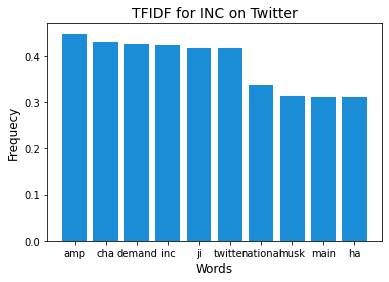

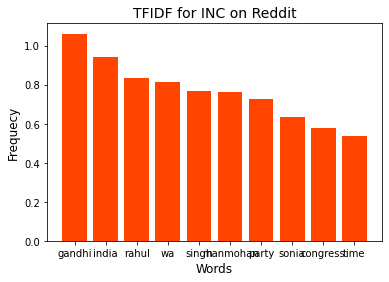

In [7]:
showBarGraph(tfidf_inc_twi,'#1a8cd8','INC','Twitter','Words','Frequecy','TFIDF')
showBarGraph(tfidf_inc_red,'#ff4500','INC','Reddit','Words','Frequecy','TFIDF')

In [8]:
twi_inc_tfidf=sorted(((value,key) for (key,value) in tfidf_inc_twi.items()), reverse=True)
#print(test)
#print(eventDictScore(twi_inc_tfidf,twi_inc_data))

red_inc_tfidf=sorted(((value,key) for (key,value) in tfidf_inc_red.items()), reverse=True)
#print(eventDictScore(red_inc_tfidf,red_inc_data))

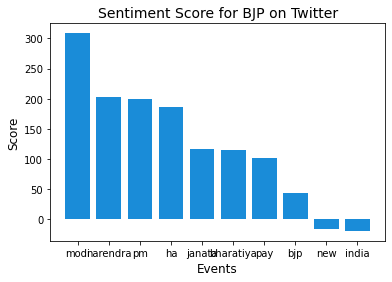

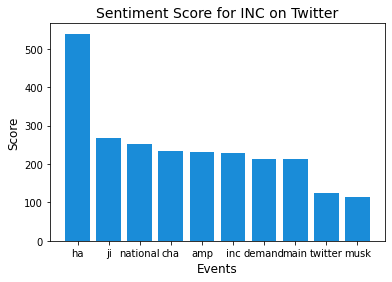

In [9]:
showBarGraph(eventDictScore(twi_bjp_tfidf,twi_bjp_data),'#1a8cd8','BJP','Twitter','Events','Score','Sentiment Score')
showBarGraph(eventDictScore(twi_inc_tfidf,twi_inc_data),'#1a8cd8','INC','Twitter','Events','Score','Sentiment Score')

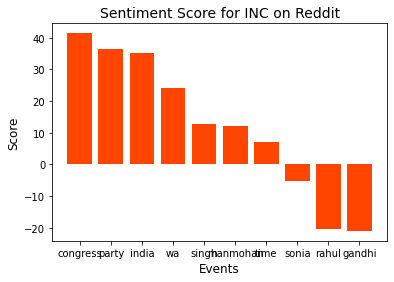

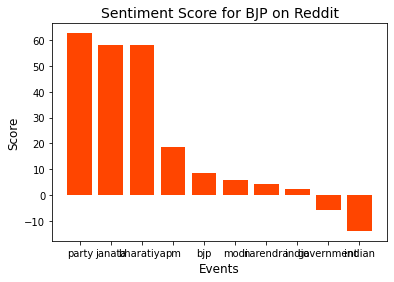

In [10]:
showBarGraph(eventDictScore(red_inc_tfidf,red_inc_data),'#ff4500','INC','Reddit','Events','Score','Sentiment Score')
showBarGraph(eventDictScore(red_bjp_tfidf,red_bjp_data),'#ff4500','BJP','Reddit','Events','Score','Sentiment Score')

In [30]:
def showGraph(data,title):
	
	data1 = []
	data2 = []
	for d in data.values():
		'''if d[0] < 0 or d[1] < 0:
			if d[0] < 0:
				d[1]+=(d[0]*-1)+1
				d[0]=d[0]*-1

			if d[1] < 0:
				d[0]+=(d[1]*-1)+1
				d[1]=d[1]*-1'''

		data1.append(d[0])
		data2.append(d[1])
	#print(data1,data2)
	'''data1 = [23,85, 72, 43, 52]
	data2 = [42, 35, 21, 16, 9]'''
	plt.bar(data.keys(), data2)
	plt.bar(range(len(data1)), data1, bottom=data2)
	#plt.bar('k','k', color=col)

	plt.legend(labels=['INC','BJP'])
	plt.title('Sentiment Score on '+title, fontsize=14)
	plt.xlabel('Events', fontsize=12)
	plt.ylabel('Score', fontsize=12)
	plt.show()

In [16]:
twi_common=Common_key(tfidf_bjp_twi,tfidf_inc_twi)
red_common=Common_key(tfidf_bjp_red,tfidf_inc_red)

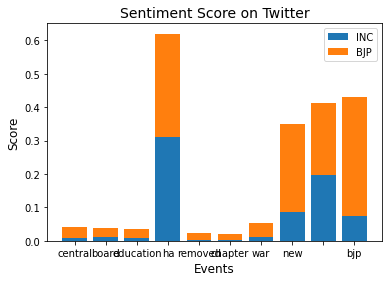

<Figure size 1440x1152 with 0 Axes>

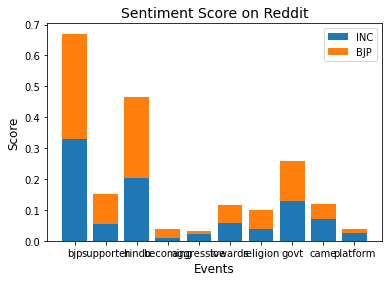

<Figure size 1440x1152 with 0 Axes>

In [31]:
showGraph(twi_common,'Twitter')
showGraph(red_common,'Reddit')